LAB 01 DLP

21K-3210

BCS-6J


AND GATE One hidden layer:

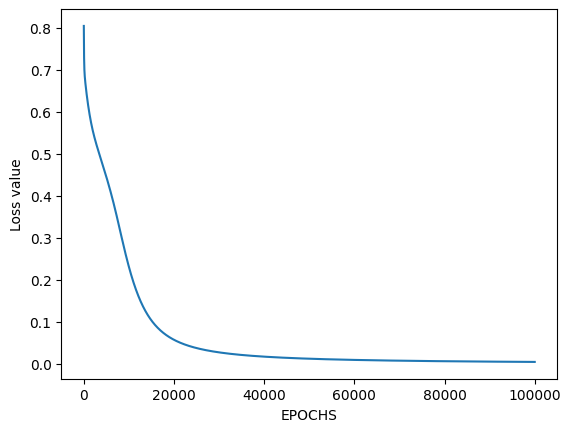

[[0. 1. 0. 0.]]


In [ ]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)

2 hidden layer for AND gate

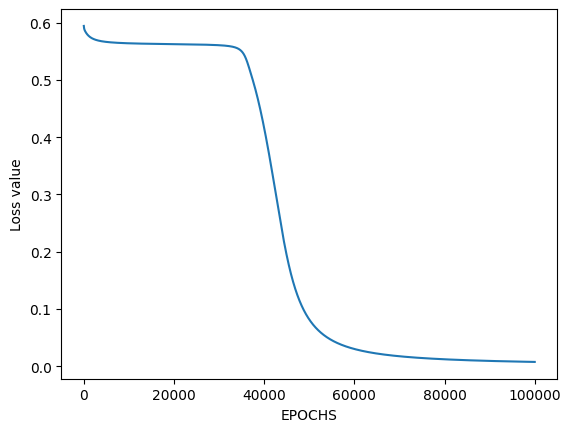

[[0. 1. 0. 0.]]


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
def initializeParameters(inputFeatures, neuronsInHiddenLayer1, neuronsInHiddenLayer2, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayer1, inputFeatures)
    W2 = np.random.randn(neuronsInHiddenLayer2, neuronsInHiddenLayer1)
    W3 = np.random.randn(outputFeatures, neuronsInHiddenLayer2)
    b1 = np.zeros((neuronsInHiddenLayer1, 1))
    b2 = np.zeros((neuronsInHiddenLayer2, 1))
    b3 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2,
                  "W3" : W3, "b3": b3}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    b3 = parameters["b3"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    logprobs = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A3

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, A2 * (1 - A2))
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["W3"] = parameters["W3"] - learningRate * gradients["dW3"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    parameters["b3"] = parameters["b3"] - learningRate * gradients["db3"]
    return parameters

# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

# Define model parameters
neuronsInHiddenLayer1 = 3 # number of neurons in first hidden layer
neuronsInHiddenLayer2 = 2 # number of neurons in second hidden layer
inputFeatures = X.shape[0] # number of input features
outputFeatures = Y.shape[0] # number of output features
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayer1, neuronsInHiddenLayer2, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A3 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input
cost, _, A3 = forwardPropagation(X, Y, parameters)
prediction = (A3 > 0.5) * 1.0
print(prediction)


  AND gate:

With different learning rates and epochs with one hidden layer

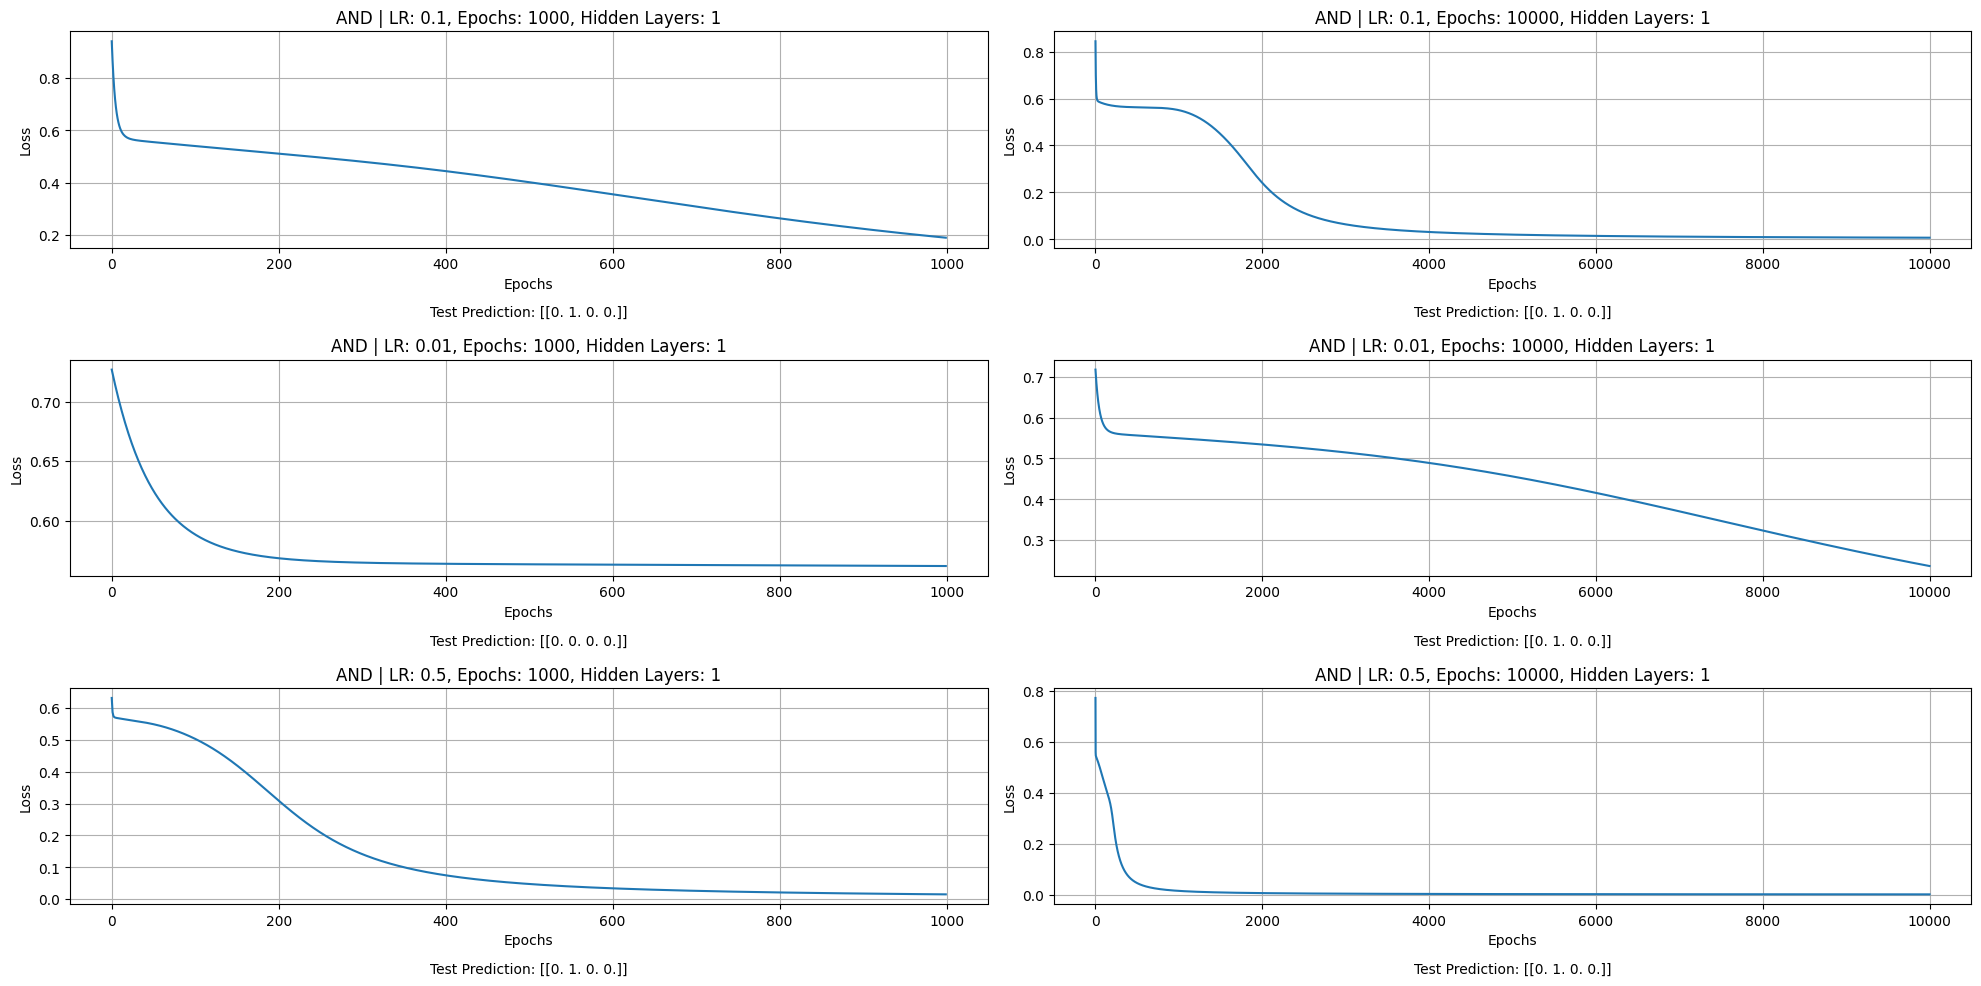

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, A2, (Z1, A1, Z2, A2)

# Backward Propagation
def backwardPropagation(X, Y, cache, parameters):
    m = X.shape[1]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    (Z1, A1, Z2, A2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    gradients = {"dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] -= learningRate * gradients["dW1"]
    parameters["W2"] -= learningRate * gradients["dW2"]
    parameters["b1"] -= learningRate * gradients["db1"]
    parameters["b2"] -= learningRate * gradients["db2"]
    return parameters

# Model to learn the AND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # AND input
Y = np.array([[0, 0, 0, 1]]) # AND output

learningRates = [0.1, 0.01, 0.5]
epochs = [1000, 10000]

fig, axes = plt.subplots(len(learningRates), len(epochs), figsize=(20, 10))

for i, lr in enumerate(learningRates):
    for j, epoch in enumerate(epochs):
        parameters = initializeParameters(X.shape[0], 1, Y.shape[0])  # Using 1 hidden layer
        losses = np.zeros((epoch, 1))
        for epoch_idx in range(epoch):
            cost, _, cache = forwardPropagation(X, Y, parameters)
            gradients = backwardPropagation(X, Y, cache, parameters)
            parameters = updateParameters(parameters, gradients, lr)
            losses[epoch_idx, 0] = cost
        ax = axes[i, j]
        ax.plot(losses)
        ax.set_title(f"AND | LR: {lr}, Epochs: {epoch}, Hidden Layers: 1")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Loss")
        ax.grid(True)

        # Testing
        X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # AND input for testing
        cost, _, (_, _, _, A3) = forwardPropagation(X_test, Y, parameters)
        prediction = (A3 > 0.5) * 1.0
        ax.text(0.5, -0.3, f"Test Prediction: {prediction}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()



NAND GATE

One layer

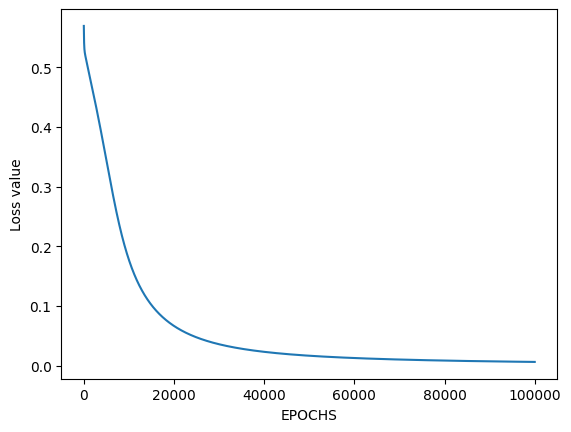

[[1. 0. 1. 1.]]


In [ ]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Model to learn the NAND truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # NAND input
Y = np.array([[1, 1, 1, 0]]) # NAND output

# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # NAND input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)


2 hidden layer Nand gate:

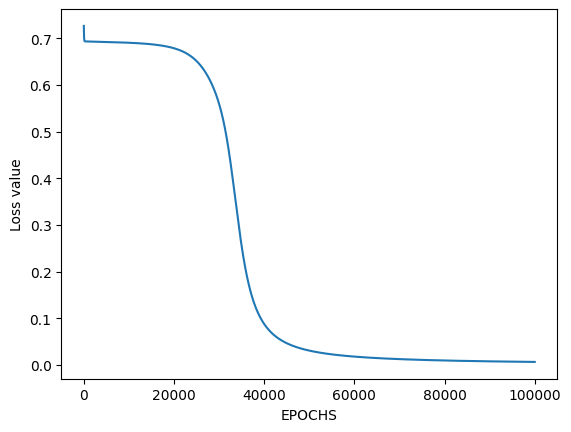

[[0. 1. 1. 0.]]


In [ ]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers1, neuronsInHiddenLayers2, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers1, inputFeatures)
    W2 = np.random.randn(neuronsInHiddenLayers2, neuronsInHiddenLayers1)
    W3 = np.random.randn(outputFeatures, neuronsInHiddenLayers2)
    b1 = np.zeros((neuronsInHiddenLayers1, 1))
    b2 = np.zeros((neuronsInHiddenLayers2, 1))
    b3 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2,
                  "W3" : W3, "b3": b3}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    b3 = parameters["b3"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    logprobs = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A3

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis = 1, keepdims = True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, A2 * (1- A2))
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["W3"] = parameters["W3"] - learningRate * gradients["dW3"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    parameters["b3"] = parameters["b3"] - learningRate * gradients["db3"]
    return parameters

# Model to learn the NAND truth table
X_nand = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # NAND input
Y_nand = np.array([[1, 1, 1, 0]])  # NAND output

# Define model parameters
neuronsInHiddenLayers1 = 3 # number of neurons in the first hidden layer
neuronsInHiddenLayers2 = 2 # number of neurons in the second hidden layer
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers1, neuronsInHiddenLayers2, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A3 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # NAND input for testing
cost, _, A3 = forwardPropagation(X, Y, parameters)
prediction = (A3 > 0.5) * 1.0
print(prediction)


NAND GATE

With different learning rates and epochs with one hidden layer

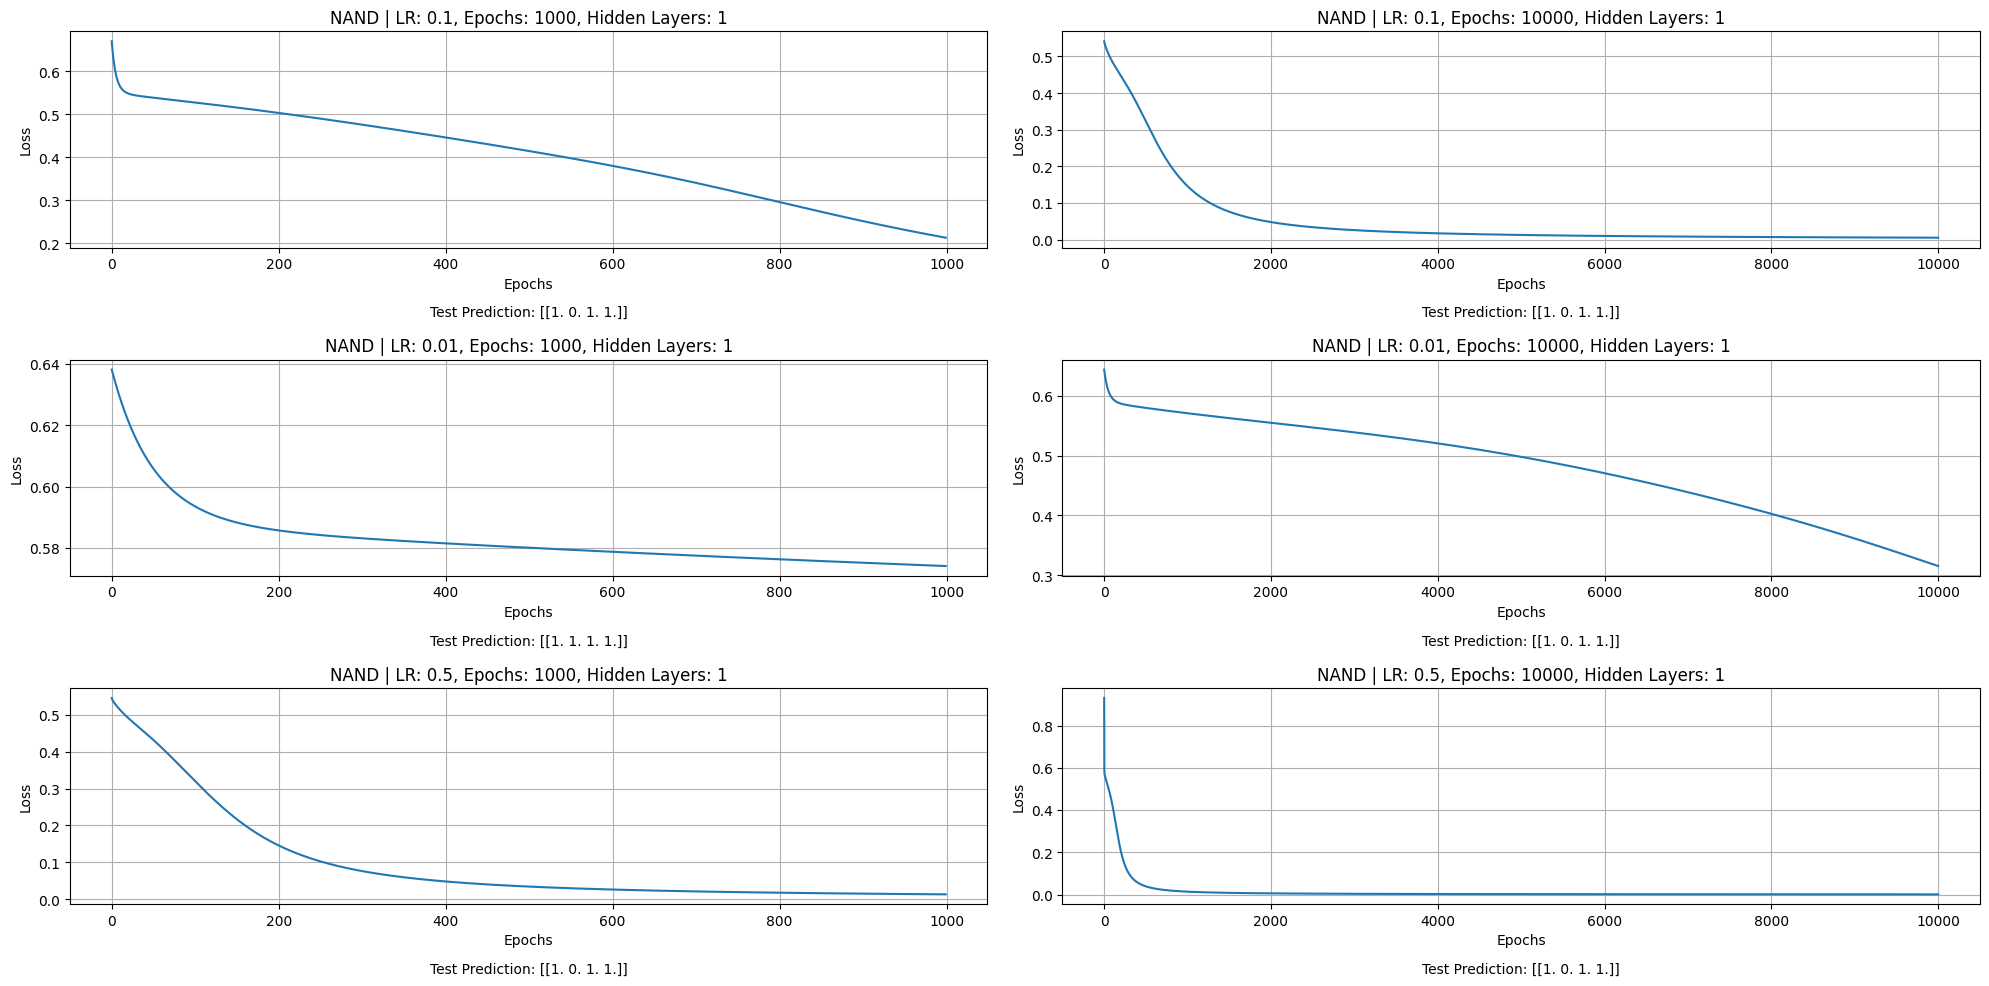

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, A2, (Z1, A1, Z2, A2)

# Backward Propagation
def backwardPropagation(X, Y, cache, parameters):
    m = X.shape[1]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    (Z1, A1, Z2, A2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    gradients = {"dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] -= learningRate * gradients["dW1"]
    parameters["W2"] -= learningRate * gradients["dW2"]
    parameters["b1"] -= learningRate * gradients["db1"]
    parameters["b2"] -= learningRate * gradients["db2"]
    return parameters

# Model to learn the NAND truth table
X_nand = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # NAND input
Y_nand = np.array([[1, 1, 1, 0]])  # NAND output

learningRates = [0.1, 0.01, 0.5]
epochs = [1000, 10000]

fig, axes = plt.subplots(len(learningRates), len(epochs), figsize=(20, 10))

for i, lr in enumerate(learningRates):
    for j, epoch in enumerate(epochs):
        parameters = initializeParameters(X_nand.shape[0], 1, Y_nand.shape[0])  # Using 1 hidden layer
        losses = np.zeros((epoch, 1))
        for epoch_idx in range(epoch):
            cost, _, cache = forwardPropagation(X_nand, Y_nand, parameters)
            gradients = backwardPropagation(X_nand, Y_nand, cache, parameters)
            parameters = updateParameters(parameters, gradients, lr)
            losses[epoch_idx, 0] = cost
        ax = axes[i, j]
        ax.plot(losses)
        ax.set_title(f"NAND | LR: {lr}, Epochs: {epoch}, Hidden Layers: 1")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Loss")
        ax.grid(True)

        # Testing
        X_test_nand = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # NAND input for testing
        cost, _, (_, _, _, A3) = forwardPropagation(X_test_nand, Y_nand, parameters)
        prediction = (A3 > 0.5) * 1.0
        ax.text(0.5, -0.3, f"Test Prediction: {prediction}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()



XOR:

One hidden layer

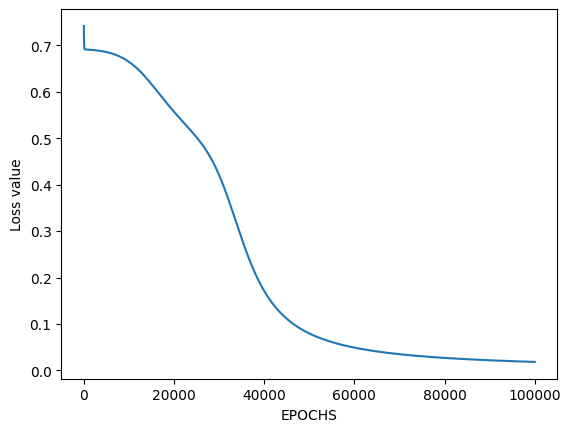

[[1. 0. 0. 1.]]


In [ ]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m

    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters

# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output

# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
print(prediction)



Two hidden layer

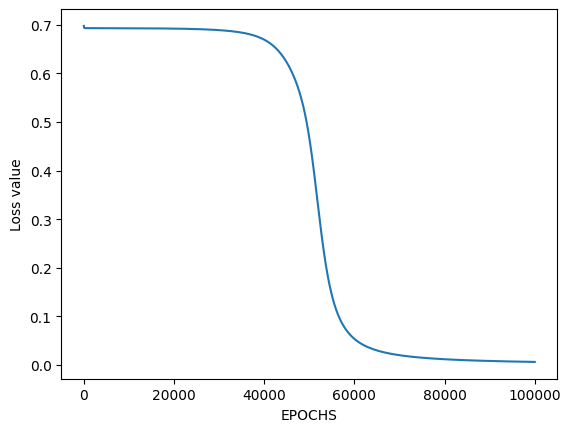

[[1. 0. 0. 1.]]


In [ ]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers1, neuronsInHiddenLayers2, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers1, inputFeatures)
    W2 = np.random.randn(neuronsInHiddenLayers2, neuronsInHiddenLayers1)
    W3 = np.random.randn(outputFeatures, neuronsInHiddenLayers2)
    b1 = np.zeros((neuronsInHiddenLayers1, 1))
    b2 = np.zeros((neuronsInHiddenLayers2, 1))
    b3 = np.zeros((outputFeatures, 1))

    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2,
                  "W3" : W3, "b3": b3}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    b3 = parameters["b3"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    logprobs = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A3

# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis = 1, keepdims = True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, A2 * (1- A2))
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["W3"] = parameters["W3"] - learningRate * gradients["dW3"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    parameters["b3"] = parameters["b3"] - learningRate * gradients["db3"]
    return parameters

# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output

# Define model parameters
neuronsInHiddenLayers1 = 3 # number of neurons in the first hidden layer
neuronsInHiddenLayers2 = 2 # number of neurons in the second hidden layer
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers1, neuronsInHiddenLayers2, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))

for i in range(epoch):
    losses[i, 0], cache, A3 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)

# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A3 = forwardPropagation(X, Y, parameters)
prediction = (A3 > 0.5) * 1.0
print(prediction)



XOR GATE:

With different learning rates and epochs with one hidden layer

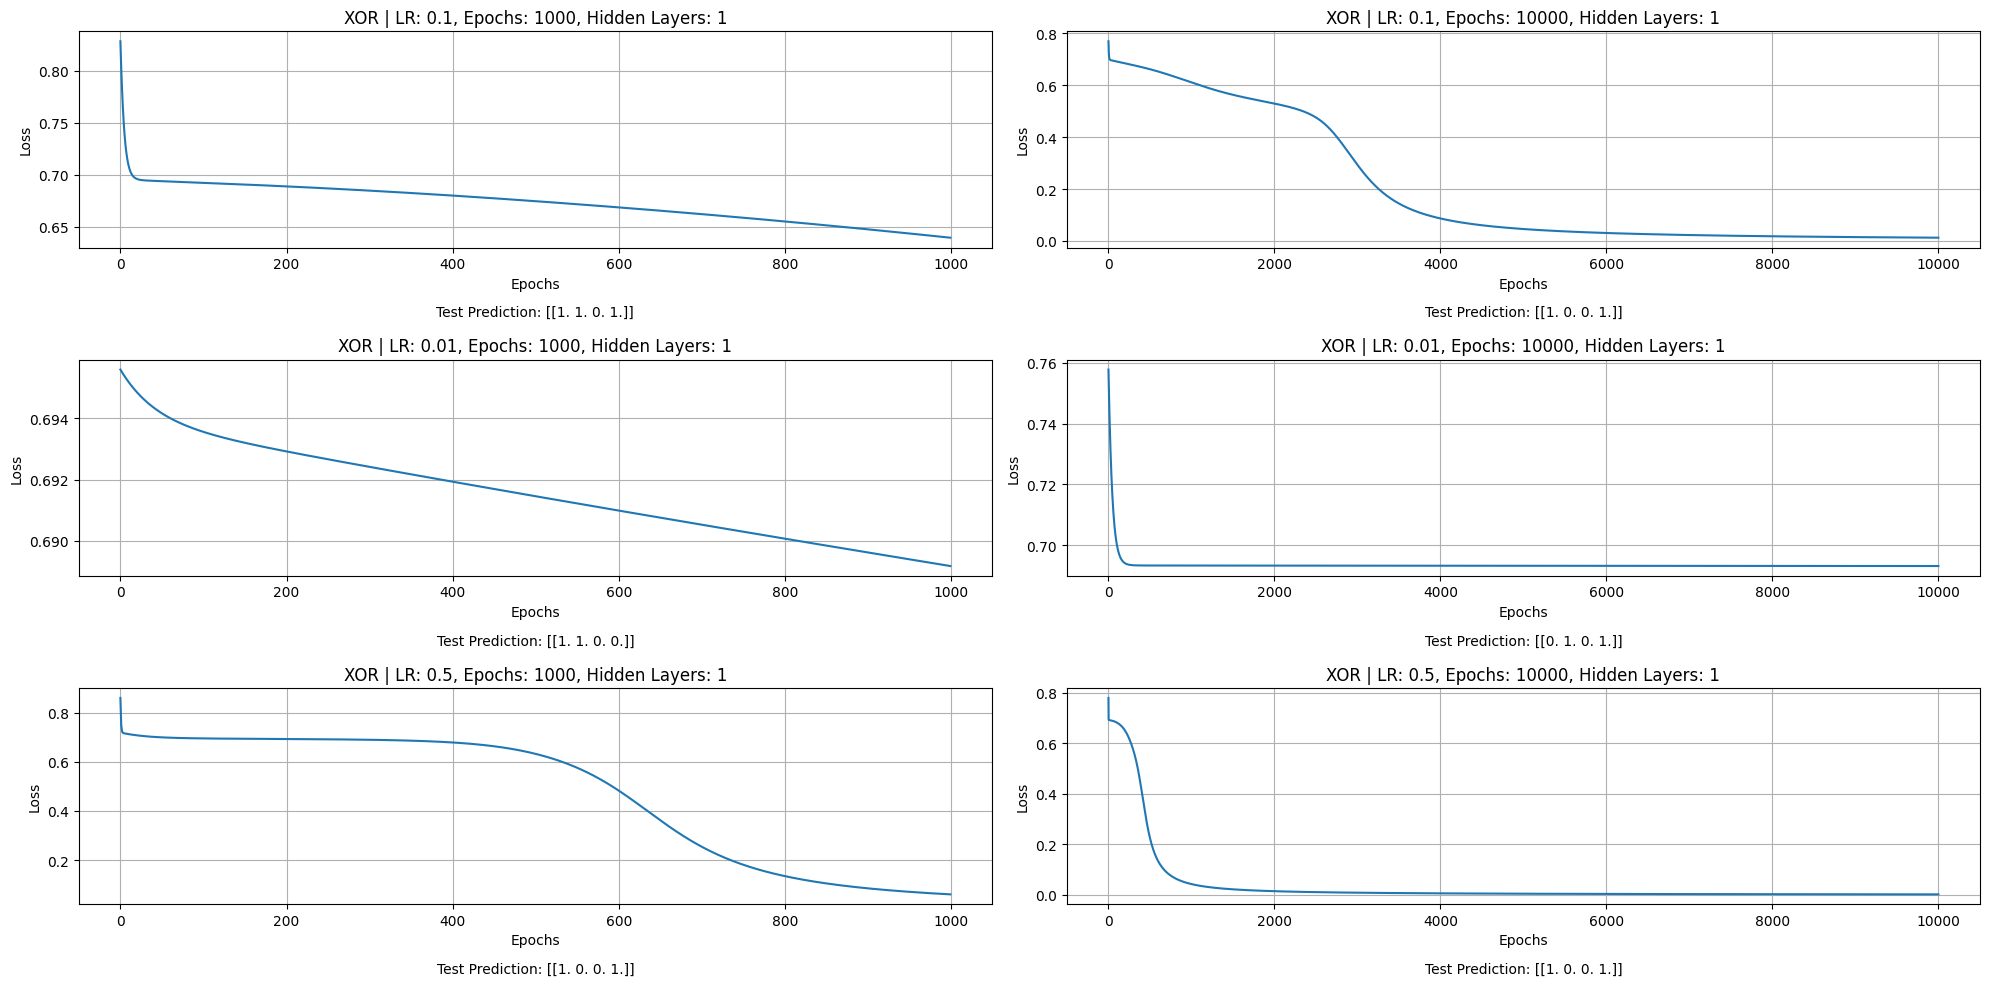

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialization of the neural network parameters
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
    parameters = {"W1" : W1, "b1": b1, "W2" : W2, "b2": b2}
    return parameters

# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, A2, (Z1, A1, Z2, A2)

# Backward Propagation
def backwardPropagation(X, Y, cache, parameters):
    m = X.shape[1]
    W1, W2, b1, b2 = parameters["W1"], parameters["W2"], parameters["b1"], parameters["b2"]
    (Z1, A1, Z2, A2) = cache
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
    gradients = {"dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    return gradients

# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] -= learningRate * gradients["dW1"]
    parameters["W2"] -= learningRate * gradients["dW2"]
    parameters["b1"] -= learningRate * gradients["db1"]
    parameters["b2"] -= learningRate * gradients["db2"]
    return parameters

# Model to learn the XOR truth table
X_xor = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])  # XOR input
Y_xor = np.array([[0, 1, 1, 0]])  # XOR output

learningRates = [0.1, 0.01, 0.5]
epochs = [1000, 10000]

fig, axes = plt.subplots(len(learningRates), len(epochs), figsize=(20, 10))

for i, lr in enumerate(learningRates):
    for j, epoch in enumerate(epochs):
        parameters = initializeParameters(X_xor.shape[0], 2, Y_xor.shape[0])  # Using 2 neurons in the hidden layer
        losses = np.zeros((epoch, 1))
        for epoch_idx in range(epoch):
            cost, _, cache = forwardPropagation(X_xor, Y_xor, parameters)
            gradients = backwardPropagation(X_xor, Y_xor, cache, parameters)
            parameters = updateParameters(parameters, gradients, lr)
            losses[epoch_idx, 0] = cost
        ax = axes[i, j]
        ax.plot(losses)
        ax.set_title(f"XOR | LR: {lr}, Epochs: {epoch}, Hidden Layers: 1")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Loss")
        ax.grid(True)

        # Testing
        X_test_xor = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])  # XOR input for testing
        cost, _, (_, _, _, A3) = forwardPropagation(X_test_xor, Y_xor, parameters)
        prediction = (A3 > 0.5) * 1.0
        ax.text(0.5, -0.3, f"Test Prediction: {prediction}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()




lab 1 completed 21k-3210

In [ ]:
import numpy as np